In [1]:
!pip install pytorch_lightning
!pip install torch_lr_finder
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.7/596.7 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import torch
import torch.optim as optim
import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

# import pytorch_lightning as pl
from tqdm import tqdm
from yolov3 import YOLOv3
from loss import YoloLoss
from utils import LearningRateFinder
# Create your config module or import it from the existing config.py file.
import config
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from main_yolov3_lightening import YOLOv3Lightning

In [3]:
from google.colab import drive
import zipfile
drive.mount('/content/gdrive')
zip_file_path = '/content/gdrive/My Drive/archive (2).zip'
extract_path = '/content'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/gdrive


In [2]:
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
from callbacks import AccuracyPlotCallback, MAPCallback

CHECKPOINT_PATH = "checkpoints/"
# Initialize the model
model = YOLOv3Lightning()

# Define the callbacks
callbacks = [ModelCheckpoint(dirpath=CHECKPOINT_PATH,verbose=True,),
                              AccuracyPlotCallback(every_n_epochs=5,train_every_n_epochs=1, test_every_n_epochs=5),
                              MAPCallback(every_n_epochs=5),
                              LearningRateMonitor()]

# Instantiate the Trainer with callbacks
trainer = pl.Trainer(
    precision=16,
    max_epochs=40,
    callbacks=callbacks
)

/usr/local/lib/python3.10/dist-packages/lightning/fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.003981071705534969
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.003981071705534969
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_260f8b4d-fddc-4020-b732-ad4539d53296.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint a

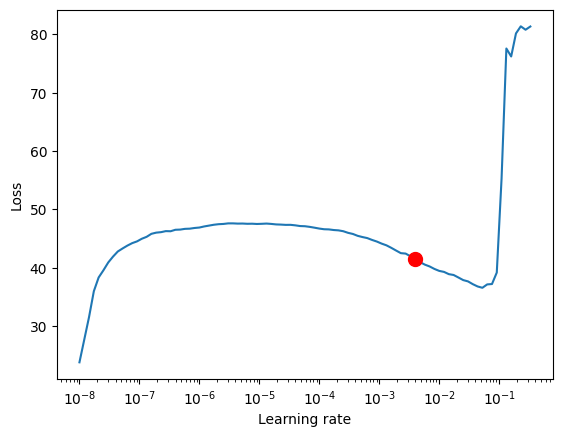

In [3]:
# Create an instance of LearningRateFinder
lr_finder = LearningRateFinder(trainer, model)

# Find and set the learning rate
lr_finder.find_and_set_learning_rate()

In [4]:
trainer.fit(model)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/checkpoints/epoch=39-step=41400.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/checkpoints/epoch=39-step=41400.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │    3.8737339973449707     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 3.8737339973449707}]

In [6]:
# # # Save the model
torch.save(model.state_dict(), "yolov3_model_with_75_mosaic.pth")

In [7]:
import shutil
drive_path = '/content/gdrive/My Drive/yolov3_model_with_75_mosaic.pth'
local_path = 'yolov3_model_with_75_mosaic.pth'  # The path where you saved the model within Colab

shutil.copyfile(local_path, drive_path)

'/content/gdrive/My Drive/yolov3_model_with_75_mosaic.pth'